In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
spark=(SparkSession.builder.appName("Capstone")\
       .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
       .enableHiveSupport().getOrCreate())


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
spark

In [114]:
spark.sql('select * from departments').show()

+-------+--------------------+
|dept_no|           dept_name|
+-------+--------------------+
|   d001|         "Marketing"|
|   d002|           "Finance"|
|   d003|   "Human Resources"|
|   d004|        "Production"|
|   d005|       "development"|
|   d006|"Quality Management"|
|   d007|             "Sales"|
|   d008|          "Research"|
|   d009|  "Customer Service"|
+-------+--------------------+



In [7]:
spark.sql("select * from pushpak.employees").show(10,truncate = False)

+------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+---------+
|emp_no|emp_title_id|birth_date|first_name|last_name|sex|hire_date |no_of_projects|last_performance_ratings|left1|last_date|
+------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+---------+
|10001 |e0003       |09-02-1953|Georgi    |Facello  |M  |6/26/1986 |9             |C                       |true |7/30/1994|
|10002 |s0001       |06-02-1964|Bezalel   |Simmel   |F  |11/21/1985|8             |B                       |false|         |
|10003 |e0003       |12-03-1959|Parto     |Bamford  |M  |8/28/1986 |1             |C                       |false|         |
|10004 |e0003       |05-01-1954|Chirstian |Koblick  |M  |12-01-1986|5             |A                       |false|         |
|10005 |s0001       |1/21/1955 |Kyoichi   |Maliniak |M  |09-12-1989|6             |A                       |false|         |


### Question 1

In [118]:
spark.sql("select s.emp_no, e.last_name, e.first_name, e.sex, s.salary from employees as e inner join salaries as s on s.emp_no = e.emp_no order by s.emp_no").show()

+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

In [136]:
spark.sql("SELECT  last_name, first_name, hire_date  FROM pushpak.employees WHERE hire_date LIKE '%1986%'").show()

+------------+----------+----------+
|   last_name|first_name| hire_date|
+------------+----------+----------+
|     Facello|    Georgi| 6/26/1986|
|     Bamford|     Parto| 8/28/1986|
|     Koblick| Chirstian|12-01-1986|
|    Zschoche|    Sanjiv|02-04-1986|
|    Schusler|      Kwee| 2/26/1986|
|        Gils|   Kshitij| 3/27/1986|
|       Rosen|  Zhongwei|10/30/1986|
|     Eugenio|   Xinglin|09-08-1986|
|Flasterstein| Sudharsan|08-12-1986|
|     Hofting|    Kendra| 3/14/1986|
|      Morton|    Hilari| 7/15/1986|
|       Birch|     Akemi|12-02-1986|
|      Giveon|    Lunjin|10-02-1986|
|      Ullian|    Xuejia| 8/22/1986|
|    Rissland|   Chikara| 1/23/1986|
|    Peltason|  Domenick| 3/14/1986|
|    Pintelas|    Zissis|02-11-1986|
|   Shimshoni|     Perry| 9/18/1986|
| Encarnacion|  Kazuhito| 8/21/1986|
|       Perry|   Xiadong|11-05-1986|
+------------+----------+----------+
only showing top 20 rows



### Question 2 

In [120]:
spark.sql("select departments.dept_no,departments.dept_name,dept_mangr.emp_no,employees.first_name, employees.last_name from pushpak.departments inner join pushpak.dept_mangr on departments.dept_no=dept_mangr.dept_no  inner join pushpak.employees on employees.emp_no=dept_mangr.emp_no").show()

+-------+------------------+------+-----------+------------+
|dept_no|         dept_name|emp_no| first_name|   last_name|
+-------+------------------+------+-----------+------------+
|   d001|         Marketing|110022|  Margareta|  Markovitch|
|   d001|         Marketing|110039|   Vishwani|    Minakawa|
|   d002|           Finance|110085|       Ebru|       Alpin|
|   d002|           Finance|110114|      Isamu|  Legleitner|
|   d003|   Human Resources|110183|    Shirish|Ossenbruggen|
|   d003|   Human Resources|110228|    Karsten|     Sigstam|
|   d004|        Production|110303|  Krassimir|     Wegerle|
|   d004|        Production|110344|     Rosine|       Cools|
|   d004|        Production|110386|       Shem|      Kieras|
|   d004|        Production|110420|      Oscar|    Ghazalie|
|   d005|       development|110511|   DeForest|    Hagimont|
|   d005|       development|110567|       Leon|    DasSarma|
|   d006|Quality Management|110725|  Peternela|     Onuegbe|
|   d006|Quality Managem

### Question 3

In [193]:
spark.sql("select employees.emp_no,employees.last_name,employees.first_name,departments.dept_name from pushpak.employees left join pushpak.dept_emp on employees.emp_no=dept_emp.emp_no left join pushpak.departments on departments.dept_no=dept_emp.dept_no").show()

+------+-----------+----------+------------------+
|emp_no|  last_name|first_name|         dept_name|
+------+-----------+----------+------------------+
| 10001|    Facello|    Georgi|       development|
| 10002|     Simmel|   Bezalel|             Sales|
| 10003|    Bamford|     Parto|        Production|
| 10004|    Koblick| Chirstian|        Production|
| 10005|   Maliniak|   Kyoichi|   Human Resources|
| 10006|    Preusig|    Anneke|       development|
| 10007|  Zielinski|   Tzvetan|          Research|
| 10008|   Kalloufi|    Saniya|       development|
| 10009|       Peac|    Sumant|Quality Management|
| 10010|   Piveteau| Duangkaew|Quality Management|
| 10010|   Piveteau| Duangkaew|        Production|
| 10011|      Sluis|      Mary|  Customer Service|
| 10012|  Bridgland|  Patricio|       development|
| 10013|     Terkki| Eberhardt|   Human Resources|
| 10014|      Genin|     Berni|       development|
| 10015|  Nooteboom|  Guoxiang|          Research|
| 10016|Cappelletti|  Kazuhito|

### Question 4

In [194]:
spark.sql("select first_name,last_name,sex from pushpak.employees where first_name = 'Hercules' and last_name like 'B%'").show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|   Benzmuller|  M|
|  Hercules|      Brendel|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baer|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|      Basagni|  M|
|  Hercules|        Biran|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Bisiani|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|        Biron|  F|
|  Hercules|      Buchter|  M|
|  Hercules|         Bain|  F|
|  Hercules|         Bahr|  M|
|  Hercules|         Baak|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Berstel|  F|
+----------+-------------+---+



### Question 5

In [195]:
spark.sql("select employees.emp_no,employees.first_name,employees.last_name,departments.dept_name from pushpak.employees left join pushpak.dept_emp on employees.emp_no=dept_emp.emp_no left join pushpak.departments on departments.dept_no=dept_emp.dept_no where departments.dept_name = 'Sales'").show()

+------+----------+------------+---------+
|emp_no|first_name|   last_name|dept_name|
+------+----------+------------+---------+
| 10002|   Bezalel|      Simmel|    Sales|
| 10016|  Kazuhito| Cappelletti|    Sales|
| 10034|     Bader|        Swan|    Sales|
| 10041|       Uri|      Lenart|    Sales|
| 10050|   Yinghua|      Dredge|    Sales|
| 10053|    Sanjiv|    Zschoche|    Sales|
| 10060|  Breannda| Billingsley|    Sales|
| 10061|       Tse|      Herber|    Sales|
| 10068|  Charlene|     Brattka|    Sales|
| 10087|   Xinglin|     Eugenio|    Sales|
| 10088|  Jungsoon|    Syrzycki|    Sales|
| 10089| Sudharsan|Flasterstein|    Sales|
| 10093|   Sailaja|     Desikan|    Sales|
| 10095|    Hilari|      Morton|    Sales|
| 10099|    Valter|     Sullins|    Sales|
| 10101|     Perla|      Heyers|    Sales|
| 10107|      Dung|        Baca|    Sales|
| 10125|     Syozo|     Hiltgen|    Sales|
| 10136|    Zissis|    Pintelas|    Sales|
| 10148|    Douadi|       Azumi|    Sales|
+------+---

### Question 6

In [113]:
spark.sql("select employees.emp_no,employees.first_name,employees.last_name,departments.dept_name from pushpak.employees left join pushpak.dept_emp on employees.emp_no=dept_emp.emp_no left join pushpak.departments on departments.dept_no=dept_emp.dept_no where departments.dept_name like '%Sales%' or departments.dept_name like'%development'").show()

+------+----------+-----------+-----------+
|emp_no|first_name|  last_name|  dept_name|
+------+----------+-----------+-----------+
| 10001|    Georgi|    Facello|development|
| 10002|   Bezalel|     Simmel|      Sales|
| 10006|    Anneke|    Preusig|development|
| 10008|    Saniya|   Kalloufi|development|
| 10012|  Patricio|  Bridgland|development|
| 10014|     Berni|      Genin|development|
| 10016|  Kazuhito|Cappelletti|      Sales|
| 10018|  Kazuhide|       Peha|development|
| 10021|     Ramzi|       Erde|development|
| 10022|    Shahaf|     Famili|development|
| 10023|     Bojan| Montemayor|development|
| 10025| Prasadram|     Heyers|development|
| 10027|    Divier|    Reistad|development|
| 10028|  Domenick|   Tempesti|development|
| 10031|   Karsten|     Joslin|development|
| 10034|     Bader|       Swan|      Sales|
| 10037|   Pradeep|   Makrucki|development|
| 10040|     Weiyi|    Meriste|development|
| 10041|       Uri|     Lenart|      Sales|
| 10043|    Yishay|    Tzvieli|d

### Question 8

In [197]:
spark.sql("select employees.last_name,count(last_name) as last_nam from pushpak.employees group by employees.last_name order by last_nam desc").show()

+-----------+--------+
|  last_name|last_nam|
+-----------+--------+
|       Baba|     226|
|      Coorg|     223|
|     Gelosh|     223|
|    Sudbeck|     222|
|     Farris|     222|
|     Adachi|     221|
|     Osgood|     220|
|    Mandell|     218|
|     Masada|     218|
|     Neiman|     218|
|    Wendorf|     217|
|Boudaillier|     217|
|   Cummings|     216|
|     Pettis|     216|
|    Solares|     216|
|     Mahnke|     216|
|    Kulisch|     215|
|   Collette|     215|
| Maksimenko|     215|
|     Emmart|     215|
+-----------+--------+
only showing top 20 rows



### Question 9

In [373]:
salaries = spark.sql("select count(salary) AS No_of_Employees,  salary from pushpak.salaries group by salary order by count(salary) desc ");
salaries.show()

+---------------+------+
|No_of_Employees|salary|
+---------------+------+
|          95346| 40000|
|             19| 55581|
|             18| 53078|
|             18| 53738|
|             17| 44564|
|             17| 47454|
|             17| 45184|
|             16| 49416|
|             16| 53783|
|             16| 43710|
|             16| 45050|
|             16| 47038|
|             16| 43995|
|             16| 51499|
|             15| 42088|
|             15| 45211|
|             15| 53876|
|             15| 43726|
|             15| 46310|
|             15| 50952|
+---------------+------+
only showing top 20 rows



### DATAFRAME CREATION

In [8]:
departments = spark.sql('select * from pushpak.departments')

In [10]:
departments.show()

+-------+------------------+
|dept_no|         dept_name|
+-------+------------------+
|   d001|         Marketing|
|   d002|           Finance|
|   d003|   Human Resources|
|   d004|        Production|
|   d005|       development|
|   d006|Quality Management|
|   d007|             Sales|
|   d008|          Research|
|   d009|  Customer Service|
+-------+------------------+



In [11]:
employees = spark.sql('select * from pushpak.employees')

In [12]:
salaries = spark.sql("select * from pushpak.salaries")

In [13]:
titles = spark.sql("select * from pushpak.title")

In [14]:
dept_emp = spark.sql("select * from pushpak.dept_emp")

In [15]:
dept_mangr = spark.sql("select *from pushpak.dept_mangr")

In [74]:
df =  employees.join(dept_emp,on="emp_no",how="left").join(salaries,on="emp_no",how="left").join(titles,employees.emp_title_id==titles.title_id).join(departments,on="dept_no",how="left")

In [75]:
df=df.withColumn('Left1',df.left1.cast("integer"))

In [76]:
df=df.withColumnRenamed('Left1','label')

In [77]:
df.printSchema()

root
 |-- dept_no: string (nullable = true)
 |-- emp_no: integer (nullable = true)
 |-- emp_title_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_ratings: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- last_date: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- title_id: string (nullable = true)
 |-- titles: string (nullable = true)
 |-- dept_name: string (nullable = true)



In [20]:
df.show(1, truncate= False)

+-------+------+------------+----------+----------+---------+---+---------+--------------+------------------------+-----+---------+------+--------+---------------+-----------+
|dept_no|emp_no|emp_title_id|birth_date|first_name|last_name|sex|hire_date|no_of_projects|last_performance_ratings|label|last_date|salary|title_id|titles         |dept_name  |
+-------+------+------------+----------+----------+---------+---+---------+--------------+------------------------+-----+---------+------+--------+---------------+-----------+
|d005   |10001 |e0003       |09-02-1953|Georgi    |Facello  |M  |6/26/1986|9             |C                       |1    |7/30/1994|60117 |e0003   |Senior Engineer|development|
+-------+------+------------+----------+----------+---------+---+---------+--------------+------------------------+-----+---------+------+--------+---------------+-----------+
only showing top 1 row



In [21]:
df1 = df.toPandas()

In [40]:
df1.fillna("NaN")

,dept_no,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,last_performance_ratings,label,last_date,salary,title_id,titles,dept_name
0,d005,10001,e0003,09-02-1953,Georgi,Facello,M,6/26/1986,9,C,1,7/30/1994,60117,e0003,Senior Engineer,development
1,d007,10002,s0001,06-02-1964,Bezalel,Simmel,F,11/21/1985,8,B,0,,65828,s0001,Staff,Sales
2,d004,10003,e0003,12-03-1959,Parto,Bamford,M,8/28/1986,1,C,0,,40006,e0003,Senior Engineer,Production
3,d004,10004,e0003,05-01-1954,Chirstian,Koblick,M,12-01-1986,5,A,0,,40054,e0003,Senior Engineer,Production
4,d003,10005,s0001,1/21/1955,Kyoichi,Maliniak,M,09-12-1989,6,A,0,,78228,s0001,Staff,Human Resources
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331598,d004,499995,e0002,9/24/1958,Dekang,Lichtner,F,01-12-1993,5,B,0,,40000,e0002,Engineer,Production
331599,d004,499996,e0003,03-07-1953,Zito,Baaz,M,9/27/1990,8,B,1,12/15/1995,58058,e0003,Senior Engineer,Production
331600,d005,499997,e0003,08-03-1961,Berhard,Lenart,M,4/21/1986,10,B,0,,49597,e0003,Senior Engineer,development
331601,d002,499998,s0001,09-05-1956,Patricia,Breugel,M,10/13/1993,1,B,0,,40000,s0001,Staff,Finance


# GRAPHS

### Question 10

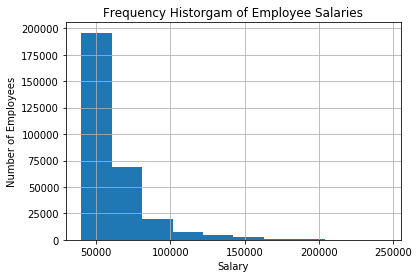

In [28]:
#Frequency Histogram of employee salaries

# Set title
# Creating histogram
salary_dist=df1.groupby(["emp_no"])[("salary")].sum()
fig, ax = plt.subplots(1, 1)
ax.hist(salary_dist)
ax.set_title("Frequency Historgam of Employee Salaries")
ax.grid()
# adding labels
ax.set_xlabel('Salary')
ax.set_ylabel('Number of Employees')
plt.savefig("Frequency Historgam of Employee Salaries.jpg")

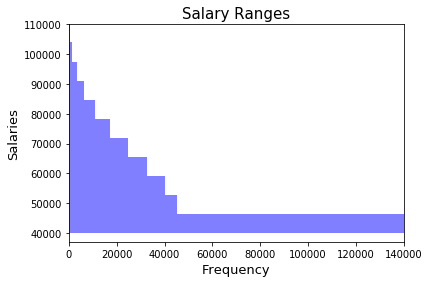

<Figure size 432x288 with 0 Axes>

In [30]:
# Visualizind salary ranges
sal_bin = list(df1.salary)
num_bins = 14
n, bins, patches = plt.hist(sal_bin, num_bins, facecolor='blue', alpha=0.5, orientation='horizontal')
plt.title('Salary Ranges', fontsize = 15)
plt.ylabel('Salaries', fontsize=13)
plt.xlabel('Frequency',fontsize=13)
plt.ylim(37000, 110000)
plt.xlim(0, 140000)
plt.show()
plt.savefig("Salary Ranges.jpg")


Text(0.5, 1.0, 'Employees Salary Distribution')

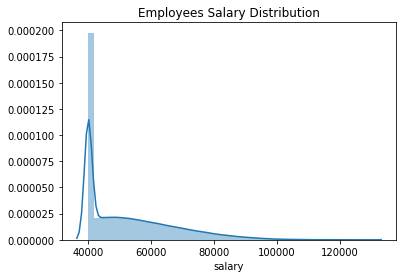

In [109]:
sns.distplot(df1['salary'])
plt.title('Employees Salary Distribution', fontsize=12)

In [34]:
#merge1 = df1.merge(emp_df, left_on='emp_no', right_on='emp_no')
#merge2 = merge1.merge(title_df, left_on='emp_title_id', right_on='title_id')
bars = df1.groupby(["titles"])
bars = pd.DataFrame(bars["salary"].mean())
bars = bars.reset_index(drop=False)
bars.head(10)

,titles,salary
0,Assistant Engineer,48615.074794
1,Engineer,48533.339845
2,Manager,51531.041667
3,Senior Engineer,48505.714313
4,Senior Staff,58557.394072
5,Staff,58460.049489
6,Technique Leader,48574.320997


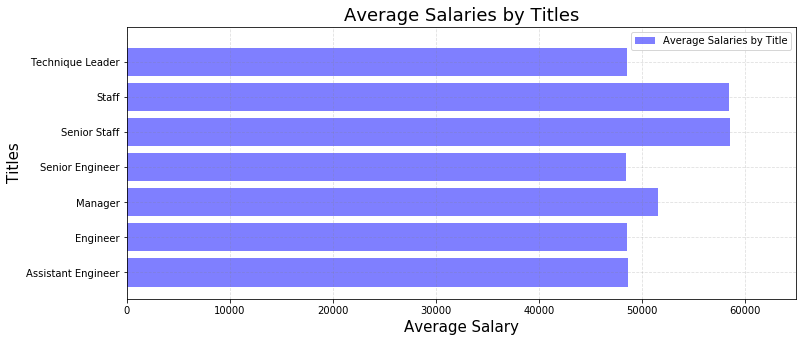

<Figure size 432x288 with 0 Axes>

In [39]:
# Visualizing average salaries by title
x_axis= np.arange(len(bars))
y_axis = bars["salary"]
plt.figure(figsize=(12,5))
bar_chart = plt.barh(x_axis, y_axis, color = 'b', alpha= 0.5, align='center', label='Average Salaries by Title') 
plt.xlim(0,65000)
plt.ylim(-0.75,7)

plt.title('Average Salaries by Titles', fontsize=18)
plt.xlabel("Average Salary", fontsize=15)
plt.ylabel("Titles", fontsize=15)
plt.legend(loc='best')

tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, bars['titles'], rotation="horizontal")
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.show()
plt.savefig("Average Salary by title.jpg")


According to this bar chart, there is very little difference in average salary amongst many of these types of positions. Going from Assistant Engineer -> Engineer -> Senior Engineer and also from Staff -> Senior Staff makes very little difference as there is nearly no pay boost. In fact, Senior Engineers make slightly LESS than more junior engineer. In addition, employee salary does not increase at all when they get a promotion according to the table above. 

Text(0.5, 1.0, 'Salary vs Gender Box Plot')

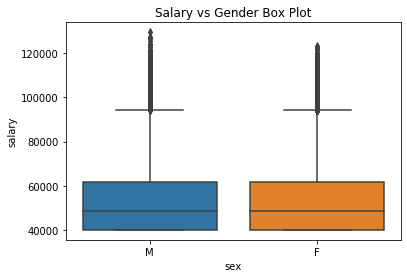

In [111]:
sns.boxplot(df1['sex'], df1['salary'])
plt.title('Salary vs Gender Box Plot', fontsize=12)

Text(0.5, 1.0, 'Average Management Salary by Department')

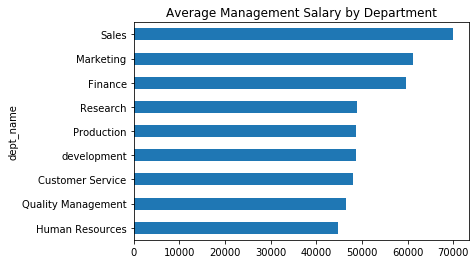

In [112]:
dept = df1.groupby('dept_name')['salary'].mean().sort_values()
dept.plot(kind='barh')
plt.title('Average Management Salary by Department', fontsize=12)

### OBSERVATION ON DATA

In [41]:
print("The employee data has {} rows & {} columns." .format(df1.shape[0], df1.shape[1]))

The employee data has 331603 rows & 16 columns.


In [42]:
print("Sex counts in the data: ")
print(df1['sex'].value_counts())
print("------------------------------------------------------------------------------------------------------------------------------")



Sex counts in the data: 
M    198850
F    132753
Name: sex, dtype: int64
------------------------------------------------------------------------------------------------------------------------------


In [43]:
print("Departments counts in the data: ")
print(df1['dept_name'].value_counts())
print("------------------------------------------------------------------------------------------------------------------------------")


Departments counts in the data: 
development           85707
Production            73485
Sales                 52245
Customer Service      23580
Research              21126
Marketing             20211
Quality Management    20117
Human Resources       17786
Finance               17346
Name: dept_name, dtype: int64
------------------------------------------------------------------------------------------------------------------------------


In [45]:
print(df1['label'].value_counts().head(10))


0    298582
1     33021
Name: label, dtype: int64


In [46]:
df1[df1.label==1.0].dept_name.value_counts()


development           8508
Production            7389
Sales                 5209
Customer Service      2414
Research              2098
Quality Management    2018
Marketing             1941
Human Resources       1797
Finance               1647
Name: dept_name, dtype: int64

In [47]:
print("Count's of employees leaving by Gender: ")
print(df1[df1.label==1.0].sex.value_counts())
print("------------------------------------------------------------------------------------------------")

Count's of employees leaving by Gender: 
M    19843
F    13178
Name: sex, dtype: int64
------------------------------------------------------------------------------------------------


In [48]:
#Joining dates in the company by year

print("Joning dates of the employee's in the company")

#Check which year or month when employees hired most
print(df1['hire_date'].value_counts().head(10))
print("------------------------------------------------------------------------------------------------------------------------------")


Joning dates of the employee's in the company
3/21/1985     147
5/24/1985     144
6/20/1985     144
9/22/1985     144
5/26/1985     143
10/28/1985    140
3/30/1985     140
05-11-1985    140
8/15/1985     140
03-07-1985    140
Name: hire_date, dtype: int64
------------------------------------------------------------------------------------------------------------------------------


In [50]:
continuous_features = ['no_of_projects','salary']

categorical_features = ['dept_name','dept_no','titles']

In [78]:
#Encoding all categorical features
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, PolynomialExpansion, VectorIndexer
from pyspark.ml.linalg import Vectors

In [79]:
SI_Departments = StringIndexer(inputCol='dept_name',outputCol='Departments_IDx')
SI_Dept_No = StringIndexer(inputCol='dept_no',outputCol='Dept_No_IDx')
SI_Titles = StringIndexer(inputCol='titles',outputCol='Titles_IDx')


# transform the data
df= SI_Departments.fit(df).transform(df)
df = SI_Dept_No.fit(df).transform(df)
df = SI_Titles.fit(df).transform(df)




In [80]:
# view the transformed data
df.select('dept_no','Dept_No_IDx','dept_name', 'Departments_IDx','titles', 'Titles_IDx').show(10)


+-------+-----------+------------------+---------------+------------------+----------+
|dept_no|Dept_No_IDx|         dept_name|Departments_IDx|            titles|Titles_IDx|
+-------+-----------+------------------+---------------+------------------+----------+
|   d005|        0.0|       development|            0.0|   Senior Engineer|       1.0|
|   d007|        2.0|             Sales|            2.0|             Staff|       0.0|
|   d004|        1.0|        Production|            1.0|   Senior Engineer|       1.0|
|   d004|        1.0|        Production|            1.0|   Senior Engineer|       1.0|
|   d003|        7.0|   Human Resources|            7.0|             Staff|       0.0|
|   d005|        0.0|       development|            0.0|   Senior Engineer|       1.0|
|   d008|        4.0|          Research|            4.0|             Staff|       0.0|
|   d005|        0.0|       development|            0.0|Assistant Engineer|       5.0|
|   d006|        6.0|Quality Management|   

In [81]:
from pyspark.ml.feature import OneHotEncoderEstimator
# create object and specify input and output column
OHE = OneHotEncoderEstimator(inputCols=['Dept_No_IDx','Departments_IDx','Titles_IDx' ],outputCols=['Dept_no_Vector','Departments_Vector','Titles_Vector'])

# transform the data
df = OHE.fit(df).transform(df)



In [82]:
# view and transform the data
df.select('dept_no','Dept_No_IDx','Dept_no_Vector','dept_name', 'Departments_IDx','Departments_Vector','titles', 'Titles_IDx','Titles_Vector').show(10)

+-------+-----------+--------------+------------------+---------------+------------------+------------------+----------+-------------+
|dept_no|Dept_No_IDx|Dept_no_Vector|         dept_name|Departments_IDx|Departments_Vector|            titles|Titles_IDx|Titles_Vector|
+-------+-----------+--------------+------------------+---------------+------------------+------------------+----------+-------------+
|   d005|        0.0| (8,[0],[1.0])|       development|            0.0|     (8,[0],[1.0])|   Senior Engineer|       1.0|(6,[1],[1.0])|
|   d007|        2.0| (8,[2],[1.0])|             Sales|            2.0|     (8,[2],[1.0])|             Staff|       0.0|(6,[0],[1.0])|
|   d004|        1.0| (8,[1],[1.0])|        Production|            1.0|     (8,[1],[1.0])|   Senior Engineer|       1.0|(6,[1],[1.0])|
|   d004|        1.0| (8,[1],[1.0])|        Production|            1.0|     (8,[1],[1.0])|   Senior Engineer|       1.0|(6,[1],[1.0])|
|   d003|        7.0| (8,[7],[1.0])|   Human Resources|

In [83]:
#Create vectors from all features column
featureCols = continuous_features + ['Dept_no_Vector',
                                   'Departments_Vector',
                                   'Titles_Vector']

In [84]:
featureCols

['no_of_projects',
 'salary',
 'Dept_no_Vector',
 'Departments_Vector',
 'Titles_Vector']

In [85]:
assembler = VectorAssembler( inputCols = featureCols, outputCol = "features")

In [86]:
assembler

VectorAssembler_d51657903059

In [87]:
train_df = assembler.transform( df )

In [88]:
#Split the dataset
train_df1, test_df = train_df.randomSplit( [0.7, 0.3], seed = 42 )

In [89]:
#Build the Linear Regression Model
from pyspark.ml.regression import LinearRegression

In [90]:
train_df1.show()

+-------+------+------------+----------+----------+-------------+---+----------+--------------+------------------------+-----+----------+------+--------+------------+---------+---------------+-----------+----------+--------------+------------------+-------------+--------------------+
|dept_no|emp_no|emp_title_id|birth_date|first_name|    last_name|sex| hire_date|no_of_projects|last_performance_ratings|label| last_date|salary|title_id|      titles|dept_name|Departments_IDx|Dept_No_IDx|Titles_IDx|Dept_no_Vector|Departments_Vector|Titles_Vector|            features|
+-------+------+------------+----------+----------+-------------+---+----------+--------------+------------------------+-----+----------+------+--------+------------+---------+---------------+-----------+----------+--------------+------------------+-------------+--------------------+
|   d001| 10017|       s0001|07-06-1958| Cristinel|    Bouloucos|  F|08-03-1993|            10|                       A|    0|          | 71380| 

In [91]:
#linreg = LinearRegression(maxIter=500, regParam=0.0)
linreg = LinearRegression()

In [92]:
lm = linreg.fit( train_df1 )

In [93]:
#Make predictions on train data and evaluate
y_pred_train = lm.transform(train_df1)

In [94]:
#Make predictions on test data and evaluate
y_pred_test = lm.transform( test_df )

In [95]:
y_pred_test.select( 'features',  'label', 'prediction').show( 5 )

+--------------------+-----+-------------------+
|            features|label|         prediction|
+--------------------+-----+-------------------+
|(24,[0,1,7,15,18]...|    0| 0.0964186533772929|
|(24,[0,1,7,15,21]...|    0|0.09646247880513589|
|(24,[0,1,7,15,18]...|    0| 0.0985969575437495|
|(24,[0,1,7,15,18]...|    0|0.09970360731312805|
|(24,[0,1,7,15,18]...|    0|0.09764217154389557|
+--------------------+-----+-------------------+
only showing top 5 rows



In [96]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [97]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter = 10,featuresCol='features',labelCol='label')
GBT_model = gbt.fit(train_df1)

predictions = GBT_model.transform(test_df)

In [98]:
evaluate=MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction",metricName="accuracy")

In [99]:
accuracy=evaluate.evaluate(predictions)

In [100]:
accuracy

0.9007209311691973

In [101]:
categorical_features,continuous_features

(['dept_name', 'dept_no', 'titles', 'label'], ['no_of_projects', 'salary'])

In [102]:
indexers = [StringIndexer(inputCol=c,outputCol="{}_idx".format(c)) for c in categorical_features]

In [103]:
##encode the categorical features

encoders=[OneHotEncoder(inputCol=idx.getOutputCol(),outputCol="{0}_enc".format(idx.getOutputCol())) for idx in indexers]

In [104]:
##initiate the linear model

lrModel=LogisticRegression(maxIter=10)

In [105]:
##create the pipeline with all the above stages

pipeline=Pipeline(stages=["indexers","encoders","assesmbler","lrModel"])

In [106]:
pipeline

Pipeline_c3cae58d7e47